In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
!ls

'My Drive'


In [0]:
!ls

ml-100k				   test.jpg
Movie_recommendation_cosine.ipynb  Untitled0.ipynb
Movie_Recommendation_System.ipynb


In [0]:
cd ml-100k

/gdrive/My Drive/Colab Notebooks/ml-100k


In [0]:
ls

allbut.pl  u1.base  u2.test  u4.base  u5.test  ub.base  u.genre  u.occupation
mku.sh     u1.test  u3.base  u4.test  ua.base  ub.test  u.info   u.user
README     u2.base  u3.test  u5.base  ua.test  u.data   u.item


In [0]:
user_cols = ['user_id','age','sex','occupation','zipcode']
users = pd.read_csv('u.user', sep='|', names=user_cols, encoding='latin-1',parse_dates=True)

In [0]:
rating_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('u.data', sep='\t', names=rating_cols, encoding='latin-1')

In [0]:
movie_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('u.item', sep='|', names=movie_cols, usecols=range(5),encoding='latin-1')

In [0]:
movie_rating = pd.merge(movies,ratings)
df = pd.merge(movie_rating,users)

In [0]:
df.shape

(100000, 12)

In [0]:
df.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zipcode
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076


In [0]:
df.drop(df.columns[[3,4,7]],axis=1,inplace=True)
ratings.drop("unix_timestamp",axis=1,inplace=True)
movies.drop(movies.columns[[3,4]],axis=1,inplace=True)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 9 columns):
movie_id        100000 non-null int64
title           100000 non-null object
release_date    99991 non-null object
user_id         100000 non-null int64
rating          100000 non-null int64
age             100000 non-null int64
sex             100000 non-null object
occupation      100000 non-null object
zipcode         100000 non-null object
dtypes: int64(4), object(5)
memory usage: 7.6+ MB


In [0]:
movie_stats = df.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stats.head()

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

In [0]:
min_50=movie_stats['rating']['size'] >= 50
movie_stats[min_50].sort_values([('rating', 'mean')], ascending=False).head()

rating          
                                                     size      mean
title                                                              
Close Shave, A (1995)                                 112  4.491071
Schindler's List (1993)                               298  4.466443
Wrong Trousers, The (1993)                            118  4.466102
Casablanca (1942)                                     243  4.456790
Wallace & Gromit: The Best of Aardman Animation...     67  4.447761

Text(0.5, 0, 'Rating(out of 5)')

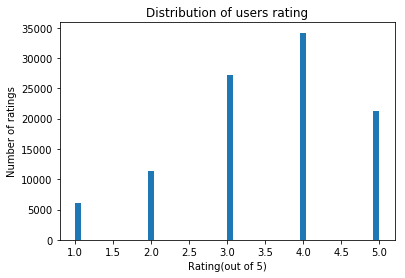

In [0]:
ratings.rating.plot.hist(bins=50)
plt.title("Distribution of users rating")
plt.ylabel('Number of ratings')
plt.xlabel('Rating(out of 5)')

Text(0.5, 0, 'Age')

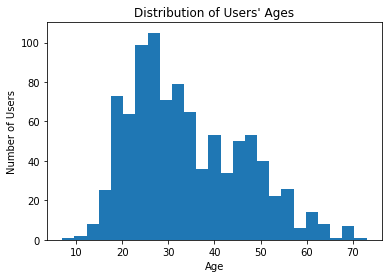

In [0]:
users.age.plot.hist(bins=25)
plt.title("Distribution of Users' Ages")
plt.ylabel('Number of Users')
plt.xlabel('Age')

In [0]:
rating_matrix = ratings.pivot_table(index=['movie_id'],columns=['user_id'],values='rating').reset_index(drop=True)
rating_matrix.fillna(0,inplace=True)
rating_matrix.head(2)

user_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943
0,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,3.0,0.0,1.0,5.0,4.0,5.0,0.0,3.0,5.0,0.0,5.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,2.0,0.0,0.0,4.0,3.0,3.0,4.0,0.0,3.0,5.0,3.0,5.0,0.0,0.0,5.0,0.0,3.0,3.0,0.0,4.0,3.0,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
1,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [0]:
movie_similarity = 1 - pairwise_distances( ratings_matrix, metric="cosine" )
np.fill_diagonal(movie_similarity,0)
rating_matrix = pd.DataFrame( movie_similarity )
rating_matrix.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1642,1643,1644,1645,1646,1647,1648,1649,1650,1651,1652,1653,1654,1655,1656,1657,1658,1659,1660,1661,1662,1663,1664,1665,1666,1667,1668,1669,1670,1671,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,0.000000,0.935912,0.928831,0.957637,0.916233,0.651198,0.978220,0.959612,0.961444,0.877940,0.966937,0.963124,0.932698,0.875016,0.975105,0.812492,0.900262,0.560229,0.770354,0.818139,0.931697,0.970942,0.908297,0.956176,0.978650,0.897403,0.880140,0.969070,0.908216,0.737698,0.963911,0.854224,0.922362,0.705517,0.591183,0.707090,0.603237,0.914957,0.930691,0.897889,...,0.307383,0.181175,0.228676,0.244070,0.228676,0.228676,0.228676,0.228676,0.228676,0.130406,0.069083,0.199604,0.497660,0.327678,0.496243,0.237433,0.358990,0.358990,0.406471,0.079210,0.077163,0.370296,0.077163,0.077163,0.077163,0.077163,0.077163,0.077163,0.061551,0.400062,0.301147,0.364751,0.278488,0.278488,0.391712,0.063420,0.063420,0.063420,0.445386,0.475924
1,0.935912,0.000000,0.911951,0.959204,0.935695,0.578273,0.926992,0.926935,0.885918,0.805475,0.956753,0.939257,0.853393,0.764229,0.902434,0.731577,0.932946,0.535796,0.637511,0.711832,0.942030,0.963404,0.869115,0.949140,0.914895,0.875714,0.946405,0.953619,0.969474,0.691353,0.963845,0.808389,0.967517,0.703164,0.627353,0.761962,0.640591,0.965341,0.945572,0.921289,...,0.311349,0.179578,0.251866,0.259023,0.251866,0.251866,0.251866,0.251866,0.251866,0.105227,0.051294,0.163939,0.555976,0.295784,0.572064,0.161272,0.311431,0.311431,0.405187,0.061222,0.059776,0.368911,0.059776,0.059776,0.059776,0.059776,0.059776,0.059776,0.048133,0.412440,0.246639,0.308845,0.251910,0.251910,0.301531,0.050834,0.050834,0.050834,0.478170,0.477571
2,0.928831,0.911951,0.000000,0.918938,0.909503,0.620559,0.944328,0.881178,0.908247,0.818130,0.942540,0.925953,0.888487,0.800373,0.906414,0.784606,0.934882,0.535689,0.708499,0.774397,0.891210,0.916459,0.851767,0.956549,0.927470,0.859970,0.896928,0.899971,0.891803,0.670705,0.921255,0.811013,0.935126,0.744265,0.541631,0.693887,0.610590,0.893298,0.920858,0.865196,...,0.291040,0.179454,0.222510,0.239093,0.222510,0.222510,0.222510,0.222510,0.222510,0.128218,0.054276,0.162337,0.571771,0.297296,0.514896,0.237641,0.315927,0.315927,0.365600,0.081212,0.079077,0.386696,0.079077,0.079077,0.079077,0.079077,0.079077,0.079077,0.056435,0.391509,0.238607,0.276156,0.297600,0.297600,0.376613,0.061653,0.061653,0.061653,0.432209,0.516444
3,0.957637,0.959204,0.918938,0.000000,0.933211,0.665996,0.962338,0.972948,0.948160,0.891714,0.979779,0.983132,0.930049,0.865640,0.929346,0.794334,0.925024,0.594347,0.739976,0.806068,0.923607,0.980607,0.948619,0.949062,0.949695,0.938421,0.916229,0.978954,0.931566,0.787201,0.973808,0.901222,0.956641,0.723566,0.598196,0.749889,0.673386,0.929460,0.967577,0.924176,...,0.314524,0.183033,0.260074,0.275702,0.260074,0.260074,0.260074,0.260074,0.260074,0.107109,0.071709,0.166634,0.522070,0.357039,0.498750,0.199601,0.378762,0.378762,0.404666,0.060571,0.058697,0.368593,0.058697,0.058697,0.058697,0.058697,0.058697,0.058697,0.051878,0.423676,0.290094,0.385551,0.256391,0.256391,0.357958,0.058033,0.058033,0.058033,0.469420,0.511942
4,0.916233,0.935695,0.909503,0.933211,0.000000,0.584300,0.922381,0.901462,0.891050,0.787281,0.946156,0.928368,0.849111,0.762712,0.900051,0.722697,0.928807,0.532518,0.649722,0.720030,0.903266,0.934046,0.862529,0.920521,0.908649,0.871508,0.914140,0.924684,0.934152,0.685685,0.943559,0.800716,0.933348,0.706725,0.636182,0.793796,0.631139,0.945378,0.928270,0.901032,...,0.323581,0.194921,0.266346,0.273109,0.266346,0.266346,0.266346,0.266346,0.266346,0.112804,0.052414,0.148167,0.551192,0.292385,0.522831,0.187357,0.299258,0.299258,0.350558,0.071089,0.069548,0.376418,0.069548,0.069548,0.069548,0.069548,0.069548,0.069548,0.047870,0.393876,0.246367,0.292211,0.264669,0.264669,0.321959,0.054700,0.054700,0.054700,0.451055,0.483451


In [0]:
try:
    #user_inp=input('Enter the reference movie title based on which recommendations are to be made: ')
    user_inp="Speed (1994)"
    inp=movies[movies['title']==user_inp].index.tolist()
    inp=inp[0]
    
    movies['similarity'] = ratings_matrix.iloc[inp]
    movies.columns = ['movie_id', 'title', 'release_date','similarity']
    movies.head(2)
    
except:
    print("Sorry, the movie is not in the database!")

In [0]:
print("Recommended movies based on your choice of ",user_inp ,": \n", movies.sort_values( ["similarity"], ascending = False )[1:10])

Recommended movies based on your choice of  Speed (1994) : 
      movie_id  ... similarity
384       385  ...   0.719504
160       161  ...   0.707567
78         79  ...   0.696583
95         96  ...   0.695556
194       195  ...   0.676778
173       174  ...   0.676664
209       210  ...   0.674811
549       550  ...   0.674143
203       204  ...   0.665776

[9 rows x 4 columns]
